In this chapter, we study how to work with PDF and Microsoft Word files using Python. PDF and Word documents are binary files, which makes them much more complex than plaintext files. In addition to text, they store lots of font, color, and layout information. If you want your programs to read or write to PDFs or Word documents, you’ll need to do more than simply pass their filenames to open().

In [2]:
!pip install PyPDF2

  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61087 sha256=21f0c54caa5aa7c4fe4f0b5eaaa4baf06d5d66e2d6a6cbfc6f741ae91ea83389
  Stored in directory: c:\users\pgao\appdata\local\pip\cache\wheels\80\1a\24\648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


PDF stands for 'Portable Document Format' and uses the .pdf file extension. Although PDFs support many features, this chapter will focus on the two things you’ll be doing most often with them: reading text content from PDFs and crafting new PDFs from existing documents.

PDFs are actually very hard to work with in Python. While PDF files are great for laying out text in a way that’s easy for people to print and read, they’re not straightforward for software to parse into plain text. As such, 'PyPDF2' might make mistakes when extracting text from a PDF and may even be unable to open some PDFs at all. There isn’t much you can do about this, unfortunately. PyPDF2 may simply be unable to work with some of your particular PDF files.

PyPDF2 does not have a way to extract images, charts, or other media from PDF documents, but it can extract text and return it as a Python string.

In [5]:
import PyPDF2
import os

In [7]:
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\PYTHON\\Python Books\\Automate the Boring Stuff with Python\\Datasets and Files'
os.chdir(path)

In [3]:
pdfFileObj = open('meetingminutes.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
print(type(pdfReader))
print('Number of the pages for the current PDF file: ', pdfReader.numPages)
pageObj = pdfReader.getPage(0) # getting a 'Page' object by calling the getPage() method (here we get the first page)
pageObj.extractText()

<class 'PyPDF2.pdf.PdfFileReader'>
Number of the pages for the current PDF file:  19


'OOFFFFIICCIIAALL  BBOOAARRDD  MMIINNUUTTEESS   Meeting of \nMarch 7\n, 2014\n        \n     The Board of Elementary and Secondary Education shall provide leadership and \ncreate policies for education that expand opportunities for children, empower \nfamilies and communities, and advance Louisiana in an increasingly \ncompetitive glob\nal market.\n BOARD \n of ELEMENTARY\n and \n SECONDARY\n EDUCATION\n  '

As you see from the example above, text extractions aren't always perfect: The text Charles E. "Chas" Roemer, President from the PDF is absent from the string returned by extractText(), and the spacing is sometimes off. Still, this approximation of the PDF text content may be good enough for your program in many cases. 

Some PDF documents have an encryption feature that will keep them from being read until whoever is opening the document provides a password. All 'PdfFileReader' objects have an 'isEncrypted' attribute that is 'True' if the PDF is encrypted and 'False' if it isn’t. Any attempt to call a function that reads the file before it has been decrypted with the correct password will result in an error.

To read an encrypted PDF, we can call the decrypt() function and pass the password as a string. After you call decrypt() with the correct password, you’ll see that calling getPage() no longer causes an error. If given the wrong password, the decrypt() function will return 0 and getPage() will continue to fail. Note that the decrypt() method decrypts only the 'PdfFileReader' object, not the actual PDF file. After your program terminates, the file on your hard drive remains encrypted. Your program will have to call decrypt() again the next time it is run. Below is an example:

In [4]:
pdfReader = PyPDF2.PdfFileReader(open('encrypted.pdf', 'rb'))
print(pdfReader.isEncrypted)
try:
    pdfReader.getPage(0)
except:
    print("PdfReadError: file has not been decrypted")

True
PdfReadError: file has not been decrypted


In [5]:
pdfReader.decrypt('rosebud') # the password is rosebud
pageObj = pdfReader.getPage(0)
print(pageObj)

{'/CropBox': [0, 0, 612, 792], '/Parent': IndirectObject(4, 0), '/Type': '/Page', '/Contents': [IndirectObject(946, 0), IndirectObject(947, 0), IndirectObject(948, 0), IndirectObject(949, 0), IndirectObject(950, 0), IndirectObject(951, 0), IndirectObject(952, 0), IndirectObject(953, 0)], '/Resources': {'/ExtGState': {'/GS0': IndirectObject(954, 0)}, '/XObject': {'/Im0': IndirectObject(955, 0)}, '/ColorSpace': {'/CS1': IndirectObject(956, 0), '/CS2': IndirectObject(956, 0), '/CS0': IndirectObject(6, 0)}, '/Font': {'/TT2': IndirectObject(957, 0), '/TT1': IndirectObject(958, 0), '/TT0': IndirectObject(959, 0), '/TT5': IndirectObject(960, 0), '/TT4': IndirectObject(961, 0), '/TT3': IndirectObject(962, 0)}}, '/MediaBox': [0, 0, 612, 792], '/StructParents': 0, '/Rotate': 0}


Notice that in the original package, there is a bug. If you use the original package, you may encounter an error. The error is the following: after decrypting the 'PdfFileReader' object, calling pdfReader.getPage(0) raises an error with the message: 

    'IndexError: list index out of range'.
    
The reason is because there is an exception to the source code. To fix this, you will need to go to the location where the library 'PyPDF2' is located. The actual code is in the Python script "pdf.py". What you need to do is to follow the instruction below. The line in red needs to be deleted and the line in green must be added. 

The complete solution to the issue is explained in the following site: https://github.com/mstamy2/PyPDF2/issues/327.

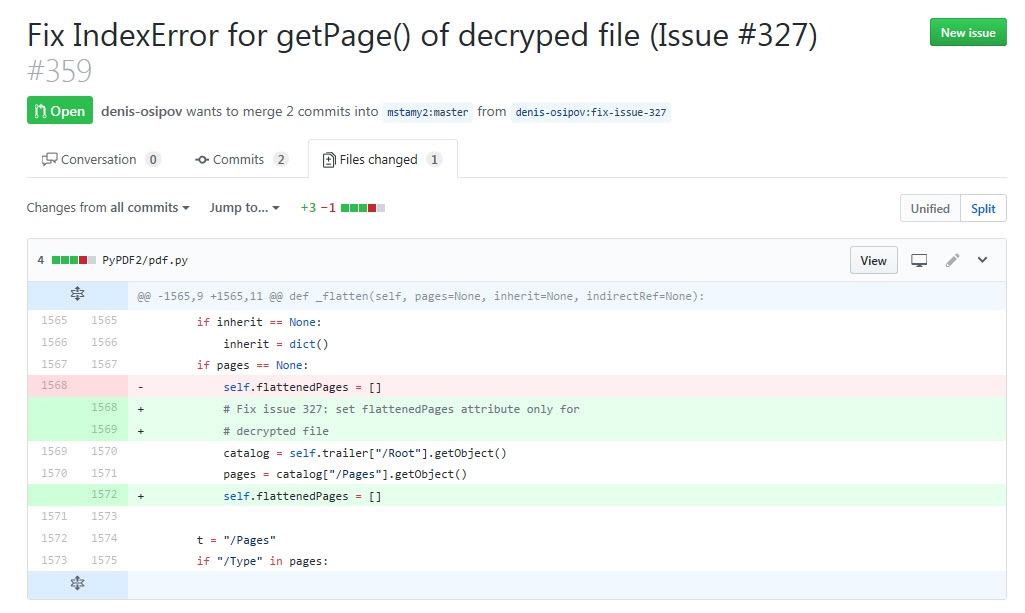

In [10]:
from IPython.display import Image
Image("ch13_snapshot_1.jpg", width=900, height=800) 

The counterpart in the package to 'PdfFileReader' objects is 'PdfFileWriter' objects, which can create new PDF files. But 'PyPDF2' cannot write arbitrary text to a PDF like Python can do with plaintext files. Instead, the PDF-writing capabilities are limited to copying pages from other PDFs, rotating pages, overlaying pages, and encrypting files.

'PyPDF2' doesn’t allow you to directly edit a PDF. Instead, you have to create a new PDF and then copy contents over from an existing document. The examples in this section will follow this general approach: 1) open one or more existing PDFs (the source PDFs) into 'PdfFileReader' objects. 2) Create a new 'PdfFileWriter' object. 3) Copy pages from the 'PdfFileReader' objects into the 'PdfFileWriter' object. 4) Finally, use the 'PdfFileWriter' object to write the output.

Creating a 'PdfFileWriter' object generates only a value that represents a PDF document in Python. It doesn’t create the actual PDF file. For that, you must call the write() method from 'PdfFileWriter’. The write() method takes a regular 'File' object that has been opened in write-binary mode. You can get such a 'File' object by calling Python’s open() function with two arguments: the string of what you want the PDF’s filename to be and 'wb' to indicate the file should be opened in write-binary mode.

Now let's start with copying pages. 'PyPDF2' can help us copy pages from one PDF document to another. This allows us to combine multiple PDF files, cut unwanted pages, or reorder pages. Below is an example:

In [7]:
pdf1File = open('meetingminutes.pdf', 'rb')
pdf2File = open('meetingminutes2.pdf', 'rb')
pdf1Reader = PyPDF2.PdfFileReader(pdf1File)
pdf2Reader = PyPDF2.PdfFileReader(pdf2File)
pdfWriter = PyPDF2.PdfFileWriter() # creating a blank PDF document here

for pageNum in range(pdf1Reader.numPages): # copy all the pages from the PDF and add them to the 'PdfFileWriter' object
    pageObj = pdf1Reader.getPage(pageNum)
    pdfWriter.addPage(pageObj)

for pageNum in range(pdf2Reader.numPages): # copy all the pages from the PDF and add them to the 'PdfFileWriter' object
    pageObj = pdf2Reader.getPage(pageNum)
    pdfWriter.addPage(pageObj)

pdfOutputFile = open('combinedminutes.pdf', 'wb')
pdfWriter.write(pdfOutputFile)
pdfOutputFile.close()
pdf1File.close()
pdf2File.close()

One cautionary note: 'PyPDF2' cannot insert pages in the middle of a 'PdfFileWriter' object. The addPage() method will only add pages to the end. Also keep in mind that the 'File' object passed to PyPDF2.PdfFileReader() needs to be opened in read-binary mode by passing 'rb' as the second argument to open(). Likewise, the 'File' object passed to PyPDF2.PdfFileWriter() needs to be opened in write-binary mode with 'wb'.

We now talk about rotating PDF files. This is very useful if you have a scanned copy of PDF files from someone else and you want to rotate the pages. The pages can be rotated in 90-degree increments with the rotateClockwise() and rotateCounterClockwise() methods. Below is an example. The resulting PDF will have one page, rotated 90 degrees clockwise. 

In [8]:
minutesFile = open('meetingminutes.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(minutesFile)
page = pdfReader.getPage(0)
page.rotateClockwise(90)

pdfWriter = PyPDF2.PdfFileWriter() # creating a blank PDF output file
pdfWriter.addPage(page) # adding the rotated page
resultPdfFile = open('rotatedPage.pdf', 'wb')
pdfWriter.write(resultPdfFile)
resultPdfFile.close()
minutesFile.close()

Now let's study overlaying pages. 'PyPDF2' can overlay the contents of one page over another, which is useful for adding a logo, timestamp, or watermark to a page. With Python, it’s easy to add watermarks to multiple files and only to pages your program specifies.

Here in the example below, we make a 'PdfFileReader' object of 'meetingminutes.pdf'. We first call the getPage(0) method to get a 'Page' object for the first page and store this object in 'minutesFirstPage'. We then make a 'PdfFileReader' object for 'watermark.pdf' and call mergePage() on 'minutesFirstPage'. The argument we pass to mergePage() is a 'Page' object for the first page of 'watermark.pdf'.

Now that we’ve called mergePage() on 'minutesFirstPag', 'minutesFirstPage' represents the watermarked first page. We make a 'PdfFileWriter' object and add the watermarked first page. Then we loop through the rest of the pages in 'meetingminutes.pdf' and add them to the 'PdfFileWriter' object. Finally, we open a new PDF file called 'watermarkedCover.pdf' and write the contents of the 'PdfFileWriter' to the new PDF. Our new PDF, called  'watermarkedCover.pdf', has all the contents of the 'meetingminutes.pdf' with its first page watermarked.

In [9]:
minutesFile = open('meetingminutes.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(minutesFile)
minutesFirstPage = pdfReader.getPage(0)
pdfWatermarkReader = PyPDF2.PdfFileReader(open('watermark.pdf', 'rb'))
minutesFirstPage.mergePage(pdfWatermarkReader.getPage(0))
pdfWriter = PyPDF2.PdfFileWriter()
pdfWriter.addPage(minutesFirstPage)

for pageNum in range(1, pdfReader.numPages):
    pageObj = pdfReader.getPage(pageNum)
    pdfWriter.addPage(pageObj)
resultPdfFile = open('watermarkedCover.pdf', 'wb')
pdfWriter.write(resultPdfFile)
minutesFile.close()
resultPdfFile.close()

Lastly, a 'PdfFileWriter' object can also add encryption to a PDF document. Below is an example. The key is to use the encrypy() method. In general, PDFs can have a user password (allowing you to view the PDF) and an owner password (allowing you to set permissions for printing, commenting, extracting text, and other features). The user password and owner password are the first and second arguments to encrypt(), respectively. If only one string argument is passed to encrypt(), it will be used for both passwords.

In this example, we copied the pages of 'meetingminutes.pdf' to a 'PdfFileWriter' object. We encrypted the 'PdfFileWriter' with the password 'swordfish', opened a new PDF called 'encryptedminutes.pdf', and wrote the contents of the 'PdfFileWriter' to the new PDF. Before anyone can view 'encryptedminutes.pdf', they’ll have to enter this password.

In [10]:
pdfFile = open('meetingminutes.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFile)
pdfWriter = PyPDF2.PdfFileWriter()
for pageNum in range(pdfReader.numPages):
    pdfWriter.addPage(pdfReader.getPage(pageNum))

pdfWriter.encrypt('swordfish') # encrypting with a password
resultPdf = open('encryptedminutes.pdf', 'wb') # this file now is encrypted with the password 'swordfish'
pdfWriter.write(resultPdf)
resultPdf.close()

We now study how to manipulate Microsoft Word documents. This is achieved through the "Python-Docx" package, which needs to be installed first. The full documentation for this package is available at https://python-docx.readthedocs.org/.

In [11]:
!pip install python-docx

Although there is a version of Word for OS X, this chapter will focus on Word for Windows. Compared to plaintext, ".docx" files have a lot of structure. This structure is represented by three different data types in 'Python-Docx'. At the highest level, a 'Document' object represents the entire document. The 'Document' object contains a list of 'Paragraph' objects for the paragraphs in the document. Each of these 'Paragraph' objects contains a list of one or more 'Run' objects. For example, the single-sentence paragraph in the next example has four 'Runs':

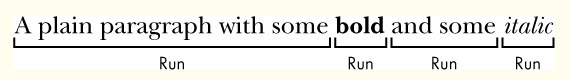

In [12]:
from IPython.display import Image
Image("ch13_snapshot_2.jpg") 

You can think of each run as a block of strings that has its own special properties. This is because the text in a (Microsoft) Word document is more than just a string. It has font, size, color, and other styling information associated with it. A 'style' in Word is a collection of these attributes. A 'Run' object is a contiguous run of text with the same 'style'. A new 'Run' object is needed whenever the text 'style' changes.

Now let's read in a Word document and parse each objects:

In [13]:
import docx

In [14]:
doc = docx.Document('demo.docx')
print('Number of paragraph objects: ', len(doc.paragraphs))
ob1=doc.paragraphs[0].text
print(type(ob1)) # string
print(ob1)
ob2=doc.paragraphs[1].text
print(type(ob2)) # string
print(ob2)
ob3=doc.paragraphs[1].runs
print(type(ob3)) # list
print(ob3)

Number of paragraph objects:  7
<class 'str'>
Document Title
<class 'str'>
A plain paragraph with some bold and some italic
<class 'list'>
[<docx.text.run.Run object at 0x00000000088A32E8>, <docx.text.run.Run object at 0x00000000088A3240>, <docx.text.run.Run object at 0x00000000088A37F0>, <docx.text.run.Run object at 0x00000000088A37B8>, <docx.text.run.Run object at 0x00000000088A38D0>]


In [15]:
print(doc.paragraphs[1].runs[0].text)
print(doc.paragraphs[1].runs[1].text)
print(doc.paragraphs[1].runs[2].text)
print(doc.paragraphs[1].runs[3].text)
print(doc.paragraphs[1].runs[4].text)

A plain paragraph with
 some 
bold
 and some 
italic


If you care only about the text, not the styling information, in the Word document, you can use the user-defined getText() function. It accepts a filename of a '.docx' file and returns a single string value of its text:

In [16]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for paragraph in doc.paragraphs:
        fullText.append(paragraph.text)
    return '\n'.join(fullText)

The getText() function opens the Word document, loops over all the 'Paragraph' objects in the paragraphs list, and then appends their text to the list in the 'fullText' list (originally set to be empty). After the loop, the strings in 'fullText' are joined together with newline characters.

In [17]:
print(getText('demo.docx'))

Document Title
A plain paragraph with some bold and some italic
Heading, level 1
Intense quote
first item in unordered list
first item in ordered list




Microsoft Word and other word processors use styles to keep the visual presentation of similar types of text consistent and easy to change. For example, perhaps you want to set body paragraphs in 11-point, Times New Roman, left-justified, ragged-right text. You can create a style with these settings and assign it to all body paragraphs. Then, if you later want to change the presentation of all body paragraphs in the document, you can just change the style, and all those paragraphs will be automatically updated.

For Word documents, there are three types of styles:

    1. Paragraph styles can be applied to 'Paragraph' objects.
    2. Character styles can be applied to 'Run' objects.
    3. Linked styles can be applied to both kinds of objects. 
    
You can give both 'Paragraph' and 'Run' objects styles by setting their 'style' attribute to a string. This string should be the name of a style. If 'style' is set to 'None', then there will be no style associated with the 'Paragraph' or 'Run' object.

The string values for the default Word styles are as follows: 'Normal', 'Heading5', 'ListBullet', 'ListParagraph', 'BodyText', 'Heading6', 'ListBullet2', 'MacroText', 'BodyText2', 'Heading7', 'ListBullet3', 'NoSpacing', 'BodyText3', 'Heading8', 'ListContinue', 'Quote', 'Caption', 'Heading9', 'ListContinue2', 'Subtitle', 'Heading1', 'IntenseQuote', 'ListContinue3', 'TOCHeading', 'Heading2', 'List', 'ListNumber', 'Title', 'Heading3', 'List2', 'ListNumber2', 'Heading4', 'List3', and 'ListNumber3'.

In some some early version of the package, when setting the 'style' attribute, we cannot use spaces in the style name. For example, while the style name may be 'Subtle Emphasis', you should set the 'style' attribute to the string value 'SubtleEmphasis' instead of using the 'Subtle Emphasis' string with empty space in between. Including spaces will cause Word to misread the style name and not apply it. But this type of phenomenon depends on what version of the package you are using and refer to the specific documentation. 

When using a linked style for a 'Run' object, you will need to add the string 'Char' to the end of its name. For example, to set the 'Quote' linked style for a 'Paragraph' object, you would use "paragraphObj.style = 'Quote'", but for a 'Run' object, you would use "runObj.style = 'Quote Char'".

'Run' objects can be further styled using text attributes. Each attribute can be set to one of three values: 'True' (the attribute is always enabled, no matter what other styles are applied to the run), 'False' (the attribute is always disabled), or 'None' (defaults to whatever the run’s style is set to).

Below lists some of the text attributes that can be set on 'Run' objects:

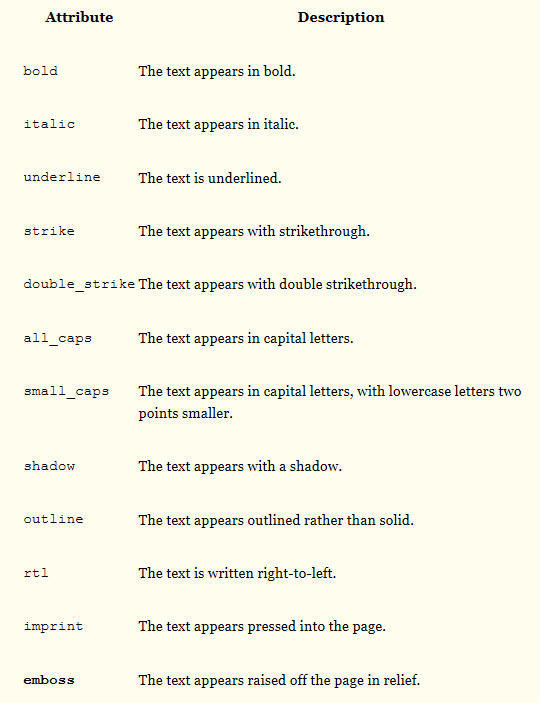

In [18]:
from IPython.display import Image
Image("ch13_snapshot_3.jpg") 

For example, to change the styles of demo.docx, The following commands will help us get the styles for the document and change styles based on different 'Paragraph' objects and 'Run' objects. 

Here in the example below, we use the text and style attributes to easily see what’s in the paragraphs in our document. We can see that it’s simple to divide a paragraph into runs and access each run individiaully. So we get the first, second, and fourth runs in the second paragraph, style each run, and save the results to a new document.

In [19]:
doc = docx.Document('demo.docx')
print('doc: ', doc.paragraphs[0].text) # 'Document Title'
print('The style of the paragraph: ', doc.paragraphs[0].style) # 'Title'

tupleobject=(doc.paragraphs[1].runs[0].text, doc.paragraphs[1].runs[1].text, doc.paragraphs[1].runs[2].text, doc.paragraphs[1].runs[3].text)
print(tupleobject)

doc:  Document Title
The style of the paragraph:  _ParagraphStyle('Title') id: 143206832
('A plain paragraph with', ' some ', 'bold', ' and some ')


In [20]:
doc.paragraphs[0].style.name 
print(doc.paragraphs[0].style.name) 
doc.paragraphs[0].style='Body Text'
print(doc.paragraphs[0].style.name) 
doc.paragraphs[1].runs[0].style = 'Quote Char'
doc.paragraphs[1].runs[1].underline = True
doc.paragraphs[1].runs[3].underline = True
doc.save('restyled.docx')

Title
Body Text


Now let's study how to write Word document using Python. To do, the most important methods include docx.Document(), which is to return a new, blank Word 'Document' object. In addition, the add_paragraph() document method adds a new paragraph of text to the document and returns a reference to the 'Paragraph' object that was added. When you’re done adding text, you may pass a filename string to the save() document method to save the 'Document' object to a file.

In a similar fashion, calling add_heading() adds a paragraph with one of the heading styles. The arguments to add_heading() are a string of the heading text and an integer from 0 to 4. The integer 0 makes the heading the 'Title' style, which is used for the top of the document. Integers 1 to 4 are for various heading levels, with 1 being the main heading and 4 the lowest subheading. The add_heading() function returns a 'Paragraph' object to save you the step of extracting it from the 'Document' object as a separate step.

In [21]:
doc = docx.Document()
doc.add_paragraph('Hello world!', 'Title') # adding a title
paraObj1 = doc.add_paragraph('This is a second paragraph.')
paraObj2 = doc.add_paragraph('This is a yet another paragraph.')
paraObj1.add_run(' This text is being added to the second paragraph.')
doc.add_heading('Header 0', 0)
doc.add_heading('Header 1', 1)
doc.add_heading('Header 2', 2)
doc.add_heading('Header 3', 3)
doc.add_heading('Header 4', 4)
doc.save('multipleParagraphs.docx')

To add a line break (rather than starting a whole new paragraph), you can call the add_break() method on the 'Run' object you want to have the break appear after. To create page break, you can use the 'docx.enum.text.WD_BREAK.PAGE' argument in the add_break() method. For details can be found here: 

    https://stackoverflow.com/questions/37608315/python-attributeerror-module-object-has-no-attribute-wd-break
    
Last but not least, let's talk about inserting pictures. 'Document' objects have an add_picture() method that will let you add an image to the end of the document. Say you have a file in the current working directory. You can add the picture file (say a PNG or JPG file) to the end of your document with a width and height (Word can use both imperial and metric units).

The example below creates a two-page Word document with 'This is on the first page!' on the first page and 'This is on the second page!' on the second. Finally, we add in a picture with a width of one inch and a height of 4 centimeters. Even though there was still plenty of space on the first page after the text 'This is on the first page!', we forced the next paragraph to begin on a new page by inserting a page break after the first run of the first paragraph:

In [22]:
doc = docx.Document()
doc.add_paragraph('This is on the first page!')
doc.paragraphs[0].runs[0].add_break(docx.enum.text.WD_BREAK.PAGE) # adding a page break
doc.add_paragraph('This is on the second page!')
doc.add_picture("ch13_snapshot_3.jpg", width=docx.shared.Inches(1), height=docx.shared.Cm(4)) # width 1 inch and height 4 cm
doc.save('twoPage.docx')